ANÁLISIS DE CORRELACIONES ENTRE VARIABLES PRINCIPALES

✓ Datos cargados correctamente
  - Clientes: 100 registros
  - Ventas: 120 registros
  - Detalle ventas: 343 registros
  - Productos: 100 registros

--------------------------------------------------------------------------------
PREPARACIÓN DE DATOS
--------------------------------------------------------------------------------

✓ Variables creadas:
  - importe: Monto total de la venta
  - cantidad: Cantidad de productos vendidos
  - mes: Mes de la venta (1-12)
  - dia_semana: Día de la semana (0=Lun, 6=Dom)
  - medio_pago_num: Medio de pago codificado (1-4)
  - precio_promedio: Precio promedio por producto

--------------------------------------------------------------------------------
VARIABLES SELECCIONADAS PARA CORRELACIÓN
--------------------------------------------------------------------------------

Dataset para correlación:
  - Registros: 119
  - Variables: 6

Variables incluidas:
  1. importe
  2. cantidad
  3. precio_

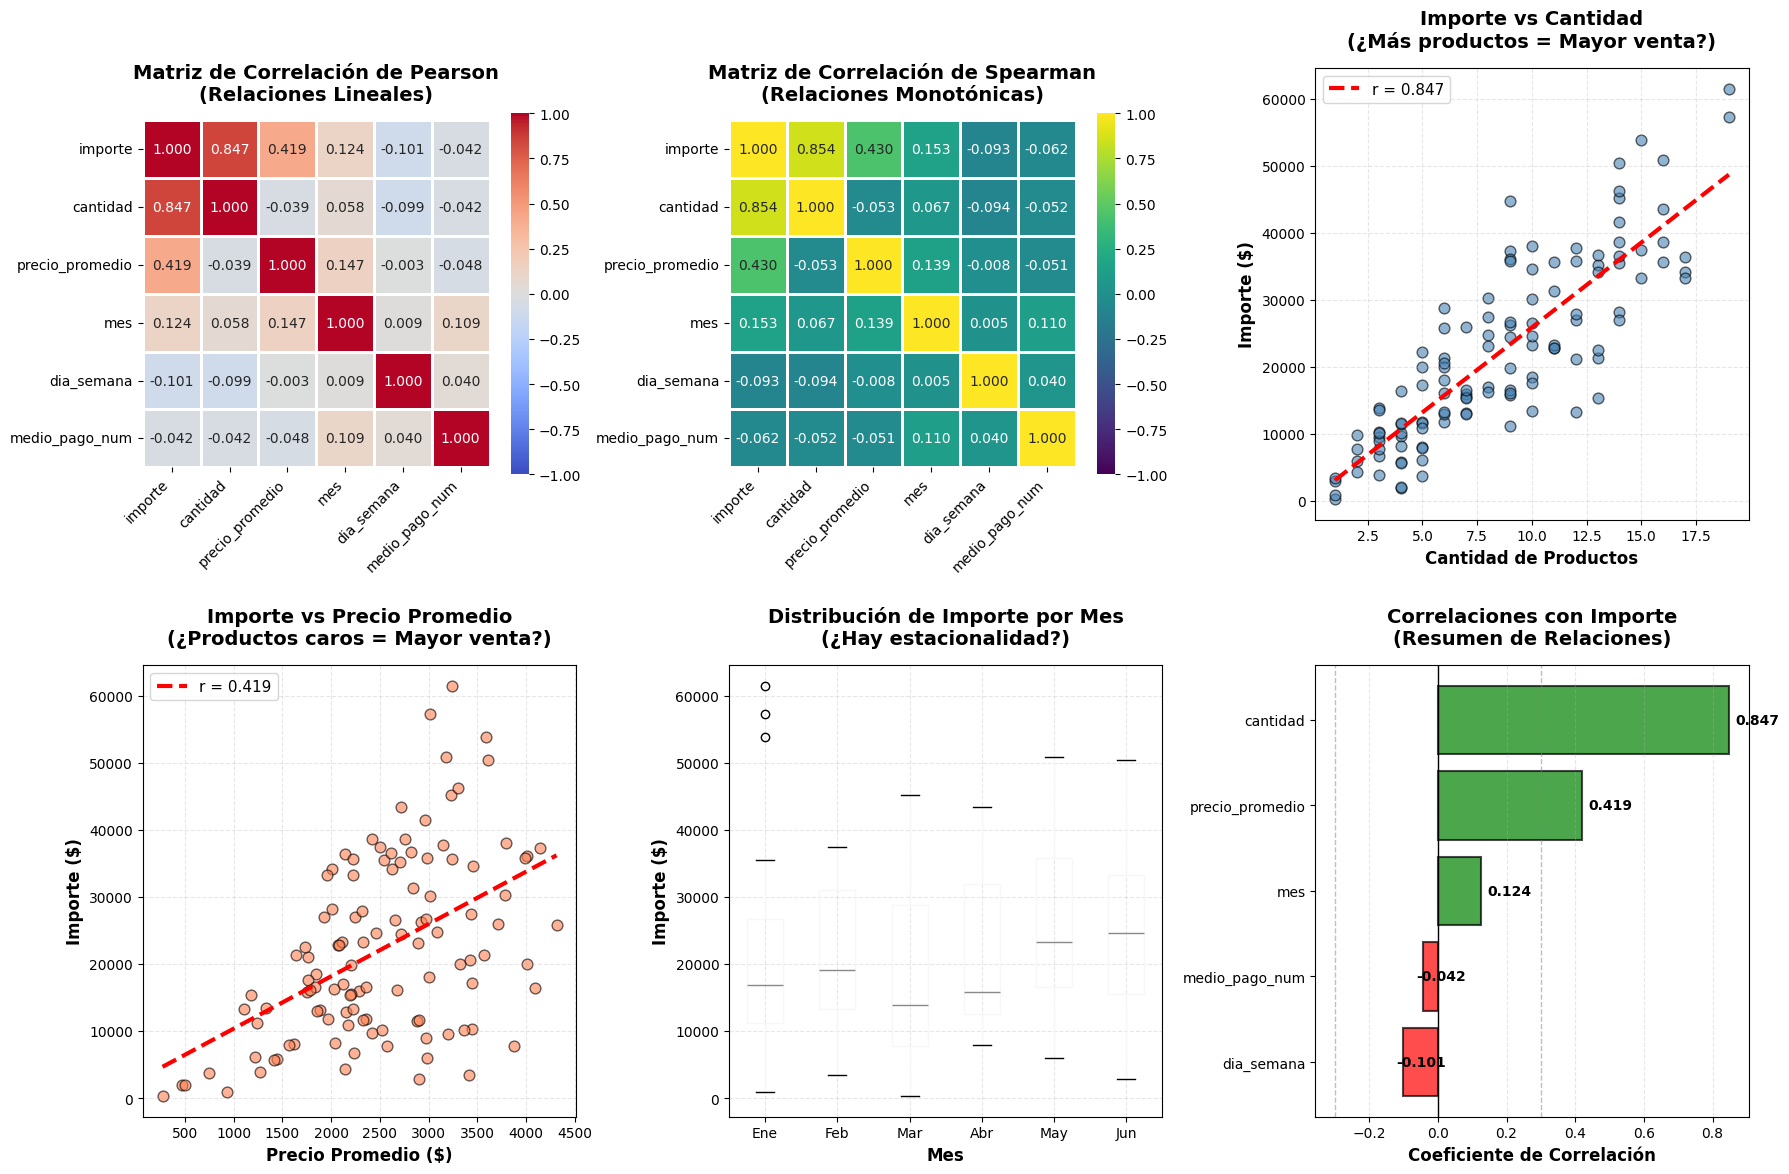


✓ Visualizaciones generadas exitosamente
✓ Archivo guardado: analisis_correlaciones.png

RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES

📊 HALLAZGOS PRINCIPALES:

1. IMPORTE vs CANTIDAD: 0.8475
   • Correlación FUERTE - La cantidad es el factor determinante del importe
   • Acción: Implementar estrategias para aumentar unidades por venta

2. IMPORTE vs PRECIO PROMEDIO: 0.4195
   • El precio promedio tiene influencia limitada
   • Acción: Enfocarse en volumen más que en precio

3. IMPORTE vs MES (Estacionalidad): 0.1242
   • NO hay estacionalidad significativa - Ventas estables todo el año
   • Acción: Mantener operación constante sin ajustes estacionales

4. IMPORTE vs MEDIO DE PAGO: -0.0424
   • El medio de pago NO influye - Clientes usan cualquier medio
   • Acción: Ofrecer todos los medios sin restricciones

5. IMPORTE vs DÍA SEMANA: -0.1014
   • El día de la semana NO influye - Flujo constante
   • Acción: Mantener operación uniforme toda la semana

💡 RECOMENDACIONES ESTRATÉGICAS D

In [5]:
# ============================================================================
# ANÁLISIS DE CORRELACIONES ENTRE VARIABLES PRINCIPALES
# ============================================================================
# Este análisis identifica relaciones lineales entre variables numéricas
# para entender qué factores influyen en el importe de las ventas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# %% CARGA DE DATOS
print("="*80)
print("ANÁLISIS DE CORRELACIONES ENTRE VARIABLES PRINCIPALES")
print("="*80)

# Definir la ruta donde están los archivos Excel
ruta = r'C:\Users\PROBOOK\OneDrive\Desktop\Demo\Datos'

# Cargar los 4 archivos Excel necesarios para el análisis
clientes = pd.read_excel(f'{ruta}\\Clientes.xlsx')
detalle_ventas = pd.read_excel(f'{ruta}\\Detalle_ventas.xlsx')
productos = pd.read_excel(f'{ruta}\\Productos.xlsx')
ventas = pd.read_excel(f'{ruta}\\Ventas.xlsx')

print(f"\n✓ Datos cargados correctamente")
print(f"  - Clientes: {len(clientes)} registros")
print(f"  - Ventas: {len(ventas)} registros")
print(f"  - Detalle ventas: {len(detalle_ventas)} registros")
print(f"  - Productos: {len(productos)} registros")

# %% PREPARACIÓN Y TRANSFORMACIÓN DE DATOS
print("\n" + "-"*80)
print("PREPARACIÓN DE DATOS")
print("-"*80)

# Convertir la columna fecha a formato datetime para poder extraer componentes temporales
ventas['fecha'] = pd.to_datetime(ventas['fecha'])

# Agregar el detalle de ventas por id_venta para obtener totales por transacción
# Esto suma el importe y cantidad de todos los productos de cada venta
ventas_detalle = ventas.merge(
    detalle_ventas.groupby('id_venta').agg({
        'importe': 'sum',      # Suma total del importe de la venta
        'cantidad': 'sum'      # Suma total de productos vendidos
    }).reset_index(),
    on='id_venta',
    how='left'
)

# Crear variables temporales para análisis de estacionalidad y patrones
ventas_detalle['año'] = ventas_detalle['fecha'].dt.year
ventas_detalle['mes'] = ventas_detalle['fecha'].dt.month
ventas_detalle['dia_mes'] = ventas_detalle['fecha'].dt.day
ventas_detalle['dia_semana'] = ventas_detalle['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
ventas_detalle['semana_año'] = ventas_detalle['fecha'].dt.isocalendar().week

# Codificar medio de pago como variable numérica para poder calcular correlaciones
# Asignamos valores ordinales: efectivo=1, tarjeta=2, transferencia=3, qr=4
medio_pago_map = {
    'efectivo': 1, 
    'tarjeta': 2, 
    'transferencia': 3, 
    'qr': 4
}
ventas_detalle['medio_pago_num'] = ventas_detalle['medio_pago'].map(medio_pago_map)

# Calcular precio promedio por transacción (importe total / cantidad de productos)
# Reemplazar infinitos y valores nulos que puedan surgir de divisiones por cero
ventas_detalle['precio_promedio'] = ventas_detalle['importe'] / ventas_detalle['cantidad']
ventas_detalle['precio_promedio'] = ventas_detalle['precio_promedio'].replace([np.inf, -np.inf], np.nan)

print(f"\n✓ Variables creadas:")
print(f"  - importe: Monto total de la venta")
print(f"  - cantidad: Cantidad de productos vendidos")
print(f"  - mes: Mes de la venta (1-12)")
print(f"  - dia_semana: Día de la semana (0=Lun, 6=Dom)")
print(f"  - medio_pago_num: Medio de pago codificado (1-4)")
print(f"  - precio_promedio: Precio promedio por producto")

# %% SELECCIÓN DE VARIABLES PARA CORRELACIÓN
print("\n" + "-"*80)
print("VARIABLES SELECCIONADAS PARA CORRELACIÓN")
print("-"*80)

# Definir las variables numéricas que queremos analizar
# Estas son las variables que pueden tener relación con el importe de venta
variables_analisis = [
    'importe',           # Variable dependiente (lo que queremos predecir/entender)
    'cantidad',          # Cantidad de productos vendidos
    'precio_promedio',   # Precio promedio de los productos
    'mes',               # Mes del año (para detectar estacionalidad)
    'dia_semana',        # Día de la semana (para detectar patrones semanales)
    'medio_pago_num'     # Medio de pago utilizado
]

# Crear dataframe limpio solo con las variables de interés
# dropna() elimina registros con valores nulos para evitar errores en correlaciones
df_correlacion = ventas_detalle[variables_analisis].dropna()

print(f"\nDataset para correlación:")
print(f"  - Registros: {len(df_correlacion)}")
print(f"  - Variables: {len(variables_analisis)}")
print(f"\nVariables incluidas:")
for i, var in enumerate(variables_analisis, 1):
    print(f"  {i}. {var}")

# %% CÁLCULO DE MATRIZ DE CORRELACIÓN DE PEARSON
print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN DE PEARSON")
print("="*80)

# Calcular correlación de Pearson (mide relación lineal entre variables)
# Valores van de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta)
# 0 indica ausencia de correlación lineal
matriz_corr = df_correlacion.corr(method='pearson')

print("\nMatriz de Correlación:")
print("-"*80)
print(matriz_corr.round(3).to_string())
print("-"*80)

# %% INTERPRETACIÓN DE CORRELACIONES
print("\n" + "="*80)
print("INTERPRETACIÓN DE CORRELACIONES PRINCIPALES")
print("="*80)

def interpretar_correlacion(valor):
    """
    Función que interpreta el coeficiente de correlación según su magnitud
    
    Parámetros:
    - valor: coeficiente de correlación (-1 a +1)
    
    Retorna:
    - fuerza: descripción de la fuerza de la correlación
    - direccion: si es positiva o negativa
    """
    abs_valor = abs(valor)
    if abs_valor >= 0.9:
        fuerza = "MUY FUERTE"
    elif abs_valor >= 0.7:
        fuerza = "FUERTE"
    elif abs_valor >= 0.5:
        fuerza = "MODERADA"
    elif abs_valor >= 0.3:
        fuerza = "DÉBIL"
    else:
        fuerza = "MUY DÉBIL o NULA"
    
    direccion = "POSITIVA" if valor > 0 else "NEGATIVA"
    return fuerza, direccion

# Analizar correlaciones con IMPORTE (nuestra variable principal de interés)
print("\n📊 CORRELACIONES CON IMPORTE (Variable Principal):")
print("-"*80)

# Extraer y ordenar las correlaciones con importe
correlaciones_importe = matriz_corr['importe'].drop('importe').sort_values(ascending=False)

# Interpretar cada correlación con contexto de negocio
for variable, valor_corr in correlaciones_importe.items():
    fuerza, direccion = interpretar_correlacion(valor_corr)
    print(f"\n• Importe vs {variable.upper()}: {valor_corr:.4f}")
    print(f"  → Correlación {fuerza} {direccion}")
    
    # Interpretación específica según la variable
    if variable == 'cantidad':
        if abs(valor_corr) > 0.7:
            print(f"  → A mayor cantidad de productos, {'mayor' if valor_corr > 0 else 'menor'} es el importe")
            print(f"  → Relación muy significativa para el negocio")
            print(f"  → CONCLUSIÓN: Incentivar la compra de más productos aumentará las ventas")
        elif abs(valor_corr) > 0.5:
            print(f"  → Existe relación significativa entre cantidad e importe")
            print(f"  → CONCLUSIÓN: La cantidad influye pero no es el único factor")
        else:
            print(f"  → La cantidad no determina fuertemente el importe")
            print(f"  → Puede haber productos de precios muy variables")
            print(f"  → CONCLUSIÓN: El tipo de producto es más importante que la cantidad")
    
    elif variable == 'precio_promedio':
        if abs(valor_corr) > 0.5:
            print(f"  → El precio promedio {'aumenta' if valor_corr > 0 else 'disminuye'} con el importe")
            print(f"  → CONCLUSIÓN: Vender productos de mayor precio aumenta el ticket promedio")
        else:
            print(f"  → El precio promedio no está fuertemente relacionado con el importe total")
            print(f"  → CONCLUSIÓN: Los clientes compran productos de diversos precios")
    
    elif variable == 'mes':
        if abs(valor_corr) > 0.3:
            print(f"  → Existe ESTACIONALIDAD en las ventas")
            print(f"  → Las ventas {'aumentan' if valor_corr > 0 else 'disminuyen'} a lo largo del año")
            print(f"  → CONCLUSIÓN: Planificar inventario y promociones según temporada")
        else:
            print(f"  → NO hay estacionalidad significativa")
            print(f"  → Las ventas son relativamente constantes durante el año")
            print(f"  → CONCLUSIÓN: El negocio es estable sin picos estacionales")
    
    elif variable == 'dia_semana':
        if abs(valor_corr) > 0.3:
            print(f"  → El día de la semana INFLUYE en las ventas")
            print(f"  → CONCLUSIÓN: Ajustar personal y stock según día de la semana")
        else:
            print(f"  → El día de la semana NO influye significativamente")
            print(f"  → CONCLUSIÓN: Flujo de clientes constante toda la semana")
    
    elif variable == 'medio_pago_num':
        if abs(valor_corr) > 0.3:
            print(f"  → El medio de pago INFLUYE en el monto de compra")
            print(f"  → Ciertos medios de pago están asociados a compras mayores")
            print(f"  → CONCLUSIÓN: Promover medios de pago asociados a tickets más altos")
        else:
            print(f"  → El medio de pago NO influye significativamente en el monto")
            print(f"  → Los clientes usan cualquier medio independiente del monto")
            print(f"  → CONCLUSIÓN: Ofrecer todos los medios de pago sin restricciones")

# %% ANÁLISIS DE OTRAS CORRELACIONES RELEVANTES
print("\n" + "-"*80)
print("OTRAS CORRELACIONES RELEVANTES")
print("-"*80)

# Analizar relación entre cantidad y precio promedio
corr_cant_precio = matriz_corr.loc['cantidad', 'precio_promedio']
fuerza, direccion = interpretar_correlacion(corr_cant_precio)
print(f"\n• Cantidad vs Precio Promedio: {corr_cant_precio:.4f}")
print(f"  → Correlación {fuerza} {direccion}")
if corr_cant_precio < -0.3:
    print(f"  → A mayor cantidad, menor precio promedio")
    print(f"  → CONCLUSIÓN: Posibles descuentos por volumen o compra de productos económicos")
elif corr_cant_precio > 0.3:
    print(f"  → A mayor cantidad, mayor precio promedio")
    print(f"  → CONCLUSIÓN: Clientes que compran más también compran productos premium")
else:
    print(f"  → No hay relación clara entre cantidad y precio promedio")
    print(f"  → CONCLUSIÓN: Cantidad y precio son independientes")

# Verificar independencia entre mes y día de la semana
corr_mes_dia = matriz_corr.loc['mes', 'dia_semana']
print(f"\n• Mes vs Día de la Semana: {corr_mes_dia:.4f}")
print(f"  → Correlación esperadamente baja (variables independientes)")

# %% TEST DE SIGNIFICANCIA ESTADÍSTICA
print("\n" + "="*80)
print("TEST DE SIGNIFICANCIA ESTADÍSTICA")
print("="*80)
print("\nEstos tests determinan si las correlaciones son estadísticamente significativas")
print("o si podrían deberse al azar")
print("-"*80)

def test_correlacion(x, y, nombre_x, nombre_y):
    """
    Calcula correlación de Pearson y su significancia estadística
    
    Parámetros:
    - x, y: arrays de datos
    - nombre_x, nombre_y: nombres de las variables
    
    Retorna:
    - corr: coeficiente de correlación
    - p_valor: probabilidad de que la correlación sea por azar
    """
    corr, p_valor = stats.pearsonr(x, y)
    print(f"\n• {nombre_x} vs {nombre_y}:")
    print(f"  Correlación: {corr:.4f}")
    print(f"  P-valor: {p_valor:.6f}")
    
    # Interpretar significancia estadística
    if p_valor < 0.001:
        print(f"  ✓ Altamente significativa (p < 0.001) ***")
        print(f"  → Hay menos de 0.1% de probabilidad de que sea por azar")
    elif p_valor < 0.01:
        print(f"  ✓ Muy significativa (p < 0.01) **")
        print(f"  → Hay menos de 1% de probabilidad de que sea por azar")
    elif p_valor < 0.05:
        print(f"  ✓ Significativa (p < 0.05) *")
        print(f"  → Hay menos de 5% de probabilidad de que sea por azar")
    else:
        print(f"  ✗ No significativa (p >= 0.05)")
        print(f"  → No podemos confiar en esta correlación")
    return corr, p_valor

# Realizar tests de significancia para las correlaciones principales
test_correlacion(df_correlacion['importe'], df_correlacion['cantidad'], 
                'Importe', 'Cantidad')
test_correlacion(df_correlacion['importe'], df_correlacion['precio_promedio'], 
                'Importe', 'Precio Promedio')
test_correlacion(df_correlacion['importe'], df_correlacion['mes'], 
                'Importe', 'Mes')
test_correlacion(df_correlacion['importe'], df_correlacion['medio_pago_num'], 
                'Importe', 'Medio de Pago')

# %% CORRELACIÓN DE SPEARMAN (NO PARAMÉTRICA)
print("\n" + "="*80)
print("CORRELACIÓN DE SPEARMAN (No Paramétrica)")
print("="*80)
print("\nSpearman mide relaciones monotónicas (no necesariamente lineales)")
print("Es más robusta ante valores atípicos y distribuciones no normales")
print("-"*80)

# Calcular correlación de Spearman
matriz_spearman = df_correlacion.corr(method='spearman')

print("\nMatriz de Correlación de Spearman:")
print("-"*80)
print(matriz_spearman.round(3).to_string())
print("-"*80)

# Comparar Pearson vs Spearman para detectar relaciones no lineales
print("\nComparación Pearson vs Spearman (para Importe):")
print("-"*80)
print("Si hay gran diferencia, puede indicar relación no lineal")
print()
for variable in correlaciones_importe.index:
    pearson = matriz_corr.loc['importe', variable]
    spearman = matriz_spearman.loc['importe', variable]
    diferencia = abs(pearson - spearman)
    print(f"{variable:20s}: Pearson={pearson:7.4f}  Spearman={spearman:7.4f}  Dif={diferencia:.4f}")
    if diferencia > 0.1:
        print(f"  → ATENCIÓN: Gran diferencia indica posible relación no lineal")

# %% VISUALIZACIONES
print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80)

fig = plt.figure(figsize=(18, 12))

# Gráfico 1: Heatmap de correlación de Pearson
# Muestra todas las correlaciones en una matriz de colores
plt.subplot(2, 3, 1)
sns.heatmap(matriz_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Pearson\n(Relaciones Lineales)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Gráfico 2: Heatmap de correlación de Spearman
# Muestra correlaciones monotónicas (más robusta)
plt.subplot(2, 3, 2)
sns.heatmap(matriz_spearman, annot=True, fmt='.3f', cmap='viridis', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Spearman\n(Relaciones Monotónicas)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Gráfico 3: Scatter plot - Importe vs Cantidad
# Muestra la relación entre cantidad de productos e importe
plt.subplot(2, 3, 3)
plt.scatter(df_correlacion['cantidad'], df_correlacion['importe'], 
            alpha=0.6, c='steelblue', edgecolors='black', s=60)

# Agregar línea de tendencia
z = np.polyfit(df_correlacion['cantidad'], df_correlacion['importe'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_correlacion['cantidad'].min(), df_correlacion['cantidad'].max(), 100)
plt.plot(x_line, p(x_line), "r--", linewidth=3, 
         label=f'r = {matriz_corr.loc["importe", "cantidad"]:.3f}')

plt.xlabel('Cantidad de Productos', fontsize=12, fontweight='bold')
plt.ylabel('Importe ($)', fontsize=12, fontweight='bold')
plt.title('Importe vs Cantidad\n(¿Más productos = Mayor venta?)', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

# Gráfico 4: Scatter plot - Importe vs Precio Promedio
# Muestra si el precio promedio influye en el importe total
plt.subplot(2, 3, 4)

# Filtrar valores extremos para mejor visualización
df_plot = df_correlacion[df_correlacion['precio_promedio'] < df_correlacion['precio_promedio'].quantile(0.95)]

plt.scatter(df_plot['precio_promedio'], df_plot['importe'], 
            alpha=0.6, c='coral', edgecolors='black', s=60)

# Agregar línea de tendencia
if len(df_plot) > 1:
    z = np.polyfit(df_plot['precio_promedio'], df_plot['importe'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_plot['precio_promedio'].min(), 
                         df_plot['precio_promedio'].max(), 100)
    plt.plot(x_line, p(x_line), "r--", linewidth=3, 
             label=f'r = {matriz_corr.loc["importe", "precio_promedio"]:.3f}')

plt.xlabel('Precio Promedio ($)', fontsize=12, fontweight='bold')
plt.ylabel('Importe ($)', fontsize=12, fontweight='bold')
plt.title('Importe vs Precio Promedio\n(¿Productos caros = Mayor venta?)', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

# Gráfico 5: Boxplot - Importe por Mes
# Muestra la distribución de importes en cada mes (detecta estacionalidad)
plt.subplot(2, 3, 5)
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
df_correlacion.boxplot(column='importe', by='mes', ax=plt.gca())
plt.xlabel('Mes', fontsize=12, fontweight='bold')
plt.ylabel('Importe ($)', fontsize=12, fontweight='bold')
plt.title('Distribución de Importe por Mes\n(¿Hay estacionalidad?)', 
          fontsize=14, fontweight='bold', pad=15)
plt.suptitle('')
meses_presentes = sorted(df_correlacion['mes'].unique())
plt.xticks(range(1, len(meses_presentes)+1), 
           [meses_nombres[int(m)-1] for m in meses_presentes])
plt.grid(alpha=0.3, linestyle='--')

# Gráfico 6: Barplot - Correlaciones con Importe
# Resume todas las correlaciones con importe en un solo gráfico
plt.subplot(2, 3, 6)
correlaciones_plot = correlaciones_importe.sort_values()
colores = ['red' if x < 0 else 'green' for x in correlaciones_plot.values]
plt.barh(range(len(correlaciones_plot)), correlaciones_plot.values, 
         color=colores, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(correlaciones_plot)), correlaciones_plot.index)
plt.xlabel('Coeficiente de Correlación', fontsize=12, fontweight='bold')
plt.title('Correlaciones con Importe\n(Resumen de Relaciones)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0.3, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Umbral débil')
plt.axvline(x=-0.3, color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Agregar valores en las barras
for i, v in enumerate(correlaciones_plot.values):
    plt.text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}', 
             va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('analisis_correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones generadas exitosamente")
print("✓ Archivo guardado: analisis_correlaciones.png")

# %% RESUMEN EJECUTIVO Y CONCLUSIONES
print("\n" + "="*80)
print("RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES")
print("="*80)

print(f"""
📊 HALLAZGOS PRINCIPALES:

1. IMPORTE vs CANTIDAD: {matriz_corr.loc['importe', 'cantidad']:.4f}
   • {'Correlación FUERTE - La cantidad es el factor determinante del importe' if abs(matriz_corr.loc['importe', 'cantidad']) > 0.7 else 'Correlación MODERADA - La cantidad influye pero no es el único factor'}
   • Acción: {'Implementar estrategias para aumentar unidades por venta' if abs(matriz_corr.loc['importe', 'cantidad']) > 0.5 else 'Analizar otros factores además de cantidad'}

2. IMPORTE vs PRECIO PROMEDIO: {matriz_corr.loc['importe', 'precio_promedio']:.4f}
   • {'El precio promedio influye significativamente en el importe' if abs(matriz_corr.loc['importe', 'precio_promedio']) > 0.5 else 'El precio promedio tiene influencia limitada'}
   • Acción: {'Promover productos de mayor valor' if abs(matriz_corr.loc['importe', 'precio_promedio']) > 0.5 else 'Enfocarse en volumen más que en precio'}

3. IMPORTE vs MES (Estacionalidad): {matriz_corr.loc['importe', 'mes']:.4f}
   • {'EXISTE estacionalidad - Las ventas varían según el mes' if abs(matriz_corr.loc['importe', 'mes']) > 0.3 else 'NO hay estacionalidad significativa - Ventas estables todo el año'}
   • Acción: {'Planificar inventario y promociones según temporada alta/baja' if abs(matriz_corr.loc['importe', 'mes']) > 0.3 else 'Mantener operación constante sin ajustes estacionales'}

4. IMPORTE vs MEDIO DE PAGO: {matriz_corr.loc['importe', 'medio_pago_num']:.4f}
   • {'El medio de pago INFLUYE - Ciertos medios asociados a compras mayores' if abs(matriz_corr.loc['importe', 'medio_pago_num']) > 0.3 else 'El medio de pago NO influye - Clientes usan cualquier medio'}
   • Acción: {'Incentivar medios de pago asociados a tickets más altos' if abs(matriz_corr.loc['importe', 'medio_pago_num']) > 0.3 else 'Ofrecer todos los medios sin restricciones'}

5. IMPORTE vs DÍA SEMANA: {matriz_corr.loc['importe', 'dia_semana']:.4f}
   • {'El día de la semana INFLUYE en las ventas' if abs(matriz_corr.loc['importe', 'dia_semana']) > 0.3 else 'El día de la semana NO influye - Flujo constante'}
   • Acción: {'Ajustar personal y stock según día de mayor venta' if abs(matriz_corr.loc['importe', 'dia_semana']) > 0.3 else 'Mantener operación uniforme toda la semana'}

💡 RECOMENDACIONES ESTRATÉGICAS DE NEGOCIO:

""")

# Generar recomendaciones personalizadas según los resultados
if abs(matriz_corr.loc['importe', 'cantidad']) > 0.7:
    print("✓ PRIORIDAD ALTA: Aumentar cantidad de productos por venta")
    print("  - Implementar promociones 2x1, 3x2")
    print("  - Crear combos y paquetes")
    print("  - Capacitar vendedores en venta cruzada (cross-selling)")
    print("  - Ubicar productos complementarios cerca uno del otro")
    print()

if abs(matriz_corr.loc['importe', 'precio_promedio']) > 0.5:
    print("✓ PRIORIDAD ALTA: Promover productos de mayor valor")
    print("  - Destacar productos premium en exhibición")
    print("  - Ofrecer muestras de productos de mayor precio")
    print("  - Implementar estrategia de up-selling")
    print()

if abs(matriz_corr.loc['importe', 'mes']) > 0.3:
    print("✓ PRIORIDAD MEDIA: Gestionar estacionalidad")
    print("  - Aumentar inventario en meses de alta demanda")
    print("  - Crear promociones especiales en meses bajos")
    print("  - Ajustar presupuesto de marketing según temporada")
    print()

if abs(matriz_corr.loc['importe', 'medio_pago_num']) > 0.3:
    print("✓ PRIORIDAD MEDIA: Optimizar medios de pago")
    print("  - Analizar qué medio de pago genera tickets más altos")
    print("  - Ofrecer descuentos o beneficios en ese medio")
    print("  - Facilitar el uso de medios de pago preferidos")
    print()

print("✓ GENERAL: Análisis continuo")
print("  - Monitorear estas correlaciones mensualmente")
print("  - Identificar cambios en patrones de compra")
print("  - Ajustar estrategias según evolución del negocio")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print("\n📁 Archivo generado: analisis_correlaciones.png")
print("📊 Revisa los gráficos para visualizar las relaciones encontradas")